In [1]:
# hydra bending 
#                      by Jian 2021.12.13
# Import Pakages

import numpy as np
import matplotlib.pyplot as plt
import random
import math
import csv

In [2]:
def initialize(N,l0):
    point = np.zeros((N,2))
    for i in range(N):
        point[i,0]=l0*i
        point[i,1]=0
    return point

In [3]:
def force_caculation(r,l0,ks,kb,N): 
    tot_F = np.zeros((N,2)) 
    Fs    = np.zeros((N,2))       # spring force
    Fb    = np.zeros((N,2))       # bending force
    rdiff = np.zeros(N)           # r norm  \r_i+1-r_i\
    tvect = np.zeros((N,2))       # unit t vector
    nvect = np.zeros((N,2))       # unit n vector
    theta = np.zeros(N)
    alpha = np.zeros(N)
    G     = np.zeros(N)
    
    for i in range(N): # parameters related to locations of two points 
        if i< N-1:
            rdiff[i]= np.linalg.norm(r[i+1,:]-r[i,:])  # r_i+1-r_i
            tvect[i]= (r[i+1,:]-r[i,:])/rdiff[i]
            nvect[i]= np.array([-(r[i+1,1]-r[i,1]),(r[i+1,0]-r[i,0])])/rdiff[i]
            theta[i]= np.arctan2(tvect[i,1],tvect[i,0])
            
            
    for i in range(N-1): # parameters related to locations of three points 
        if i< N-2:
            alpha[i]=theta[i+1]-theta[i]
            if abs(alpha[i])>= np.pi/2:
                alpha[i]=alpha[i]+2*np.pi            
            G[i]    =alpha[i]-Theta0
        
    for i in range(N): # force
        if i==0:
            Fs[i] = ks*(rdiff[i]-l0)*tvect[i]
            Fb[i] = -kb/l0*G[i]/rdiff[i]*nvect[i]
            continue
            
        if i==N-1:
            Fs[i] = -ks*(rdiff[i-1]-l0)*tvect[i-1]
            Fb[i] = - kb/l0*(G[i-2]/rdiff[i-1]*nvect[i-1])
            #print(Fb[i])
            continue     
            
        if i==1:
            Fs[i] = ks*(rdiff[i]-l0)*tvect[i]-ks*(rdiff[i-1]-l0)*tvect[i-1]
            Fb[i] = kb/l0*(G[i-1]/rdiff[i-1]*nvect[i-1]-(G[i]-G[i-1])/rdiff[i]*nvect[i])
            #print(Fb[i])
            continue
        

                      
        if i==N-2:
            Fs[i] = ks*(rdiff[i]-l0)*tvect[i]-ks*(rdiff[i-1]-l0)*tvect[i-1]
            Fb[i] = kb/l0*((G[i-1]-G[i-2])/rdiff[i-1]*nvect[i-1]+G[i-1]/rdiff[i]*nvect[i])
            #print(Fb[i])
            continue
       
        else:
            Fs[i] =ks*(rdiff[i]-l0)*tvect[i]-ks*(rdiff[i-1]-l0)*tvect[i-1]
            Fb[i] =kb/l0*((G[i-1]-G[i-2])/rdiff[i-1]*nvect[i-1]-(G[i]-G[i-1])/rdiff[i]*nvect[i])
            #print(Fb[i])

    tot_F=Fs+Fb
   # print(tot_F)
    
    return (tot_F)

In [4]:
bc     = 1                     # boundary condition 0 free  1 supporting 2 hinged 3.clamped
nl     = 1                     # 1, 2   length of chain

###############################################################################################


ks     = 1000.0               # K=k_s/k_b=50
kb     = 1.0    
R0     = 1                    # reference length
Theta0 = np.pi/30             # np.pi/30
l0     = Theta0*R0
ntheta = Theta0/np.pi
N     = int(nl/ntheta)+1


r     = np.zeros((N,2))       # position
tot_force    = np.zeros((N,2))

if bc == 2 or bc == 3:
    Theta0=-np.pi/60

r     = initialize(N,l0)   

t     = 0
step  = 0
dt    = 1e-4


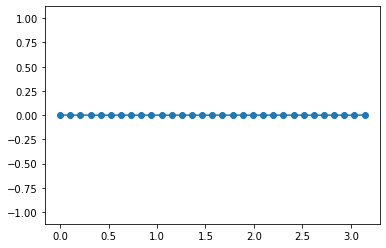

t: 0.0001
end-to-end distance
3.141592653589793





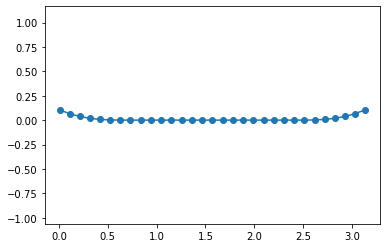

t: 0.1
end-to-end distance
3.117948828850157





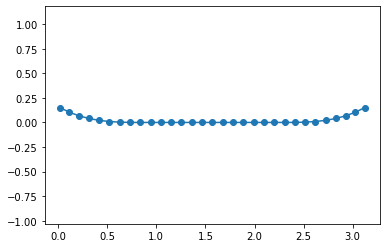

t: 0.2
end-to-end distance
3.098286181289683





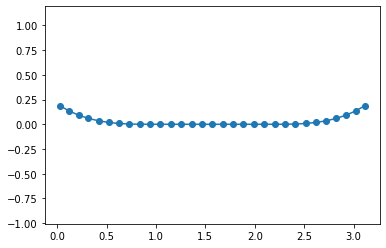

t: 0.3
end-to-end distance
3.080091397100293





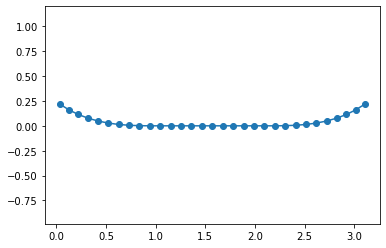

t: 0.4
end-to-end distance
3.0630683957186378





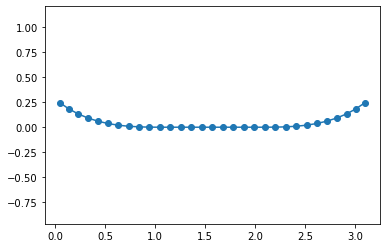

t: 0.5
end-to-end distance
3.046856598879509





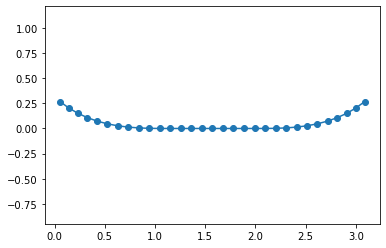

t: 0.6
end-to-end distance
3.031258569004882





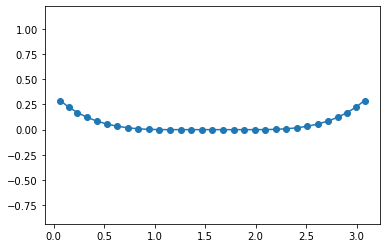

t: 0.7000000000000001
end-to-end distance
3.0163653980887615





KeyboardInterrupt: 

In [5]:
########################################## Evolution ################################################


while t <= 10000 :
    step+=1
    t = dt*step
    
    tot_force=force_caculation(r,l0,ks,kb,N)
        
    r = r + dt*tot_force
    leed = np.linalg.norm(r[N-1,:]-r[0,:])
    

    
    if bc == 1:
        for j in range(N):     # boundary condition 1
            if r[j,1]<=0:
                r[j,1]=0
                
    if bc == 2:
        r[0,1]  = 0
        r[N-1,1]= 0
        
    if bc == 3:
        r[0,1]=0
        r[1,1]=0
        r[N-1,1]=0
        r[N-2,1]=0
        
    
########################################## output to file ################################################     
    if(step==1 or step%5e4 == 0):
        data=[t,leed]
        
        out_f = open('data_1.0.csv','a',newline='')
        writer = csv.writer(out_f)
        writer.writerow(data)
        out_f.close()   
        
        out_f = open('point_1.0.csv','a',newline='')
        writer = csv.writer(out_f)
        writer.writerow(r.reshape(-1,1))
        out_f.close()
    
    if(step==1 or step%1e4 == 0):
        data=[t,leed]
        
        out_f = open('ete_1.0.csv','a',newline='')
        writer = csv.writer(out_f)
        writer.writerow(data)
        out_f.close()   

    
########################################## output to screen ################################################    
    if(step==1 or step%1e3 == 0):
        
        plt.plot(r[:,0],r[:,1], 'o-')
        plt.axis('equal')    
        plt.show()

        print("t:",t)
        print ("end-to-end distance")
        print (leed)
        print ("\n\n")